# Load the dataset


In [135]:
import pandas as pd
import numpy as np
df=pd.read_csv("Reviews.csv")
df1=pd.read_csv("refined_data.csv")
df.shape


(568454, 10)

# Removal of invalid records from the dataset






**HelpfulnessNumerator:** Denotes how many people find this helpful.

**HelpfulnessDenominator:** Denotes the total no.of people find this helpful and not .

So the **HelpfulnessNumerator** must be less than or equals to **HelpfulnessDenominator**
<br>
<br>

********************************************************************************************
<br>
There might records with empty reviews ,so we can remove them
**Removing the records with review length less than 2**
<br>








In [136]:
import numpy as np
invalid_helpfulness=df[df['HelpfulnessNumerator']>df['HelpfulnessDenominator']]
#invalid_time=df[df["Time"]>time.time()]
text_to_length=np.array(list(map(lambda review:len(review),df['Text'].values)))

print("invalid reviews are(less than 2 chars) ",len(text_to_length[text_to_length<2]))

print("invalid_helpfulness reviews are ",len(invalid_helpfulness))
#print("invalid time reviews are ",len(invalid_time))
print(df.shape)
df=df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]
print(df.shape)

invalid reviews are(less than 2 chars)  0
invalid_helpfulness reviews are  2
(568454, 10)
(568452, 10)


**We did find that at a signle timestampp we have same reviews which is not possible, perhaps if a user giving review to a single food product  that same review also assigned to different flavours of that product from that user   **

So we can remove such all records and keep one product review.

In [137]:
def remove_duplicate_records(dataframe):
  '''
  This function will remove the duplicate records because we have more than one review for a user at a specific time which is not possible
  '''
  print("Size before removing duplicates ",dataframe.shape)
  dataframe.sort_values('UserId',axis=0,inplace=True,kind='mergesort',na_position="last") # sorting based on the userid's
  #fi.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
  dataframe.drop_duplicates(subset={"UserId","ProfileName","Time","Summary"},keep="first",inplace=True)
  print("Size after removing duplicates ",dataframe.shape)
  return dataframe
#print(df.head(5))
df=remove_duplicate_records(df)
print(df.shape)

Size before removing duplicates  (568452, 10)
Size after removing duplicates  (392907, 10)
(392907, 10)


# Adding a Class label
In our amazon fine food reviews dataset ,we dont have a class lable for any reviews such as whether it is possitive review  or negative.

**we can do assign by the rating the user given for that product  **
  
     

*  if rating >=3 (such as 3,4,5) out of 5 we assign a class lable +ve.
*    if rating <3 (such as 1,2) out of 5 we assign a class lable -ve.(because users give 1 or 2 if they didn't satisfy about the product)


     
    
     
     

In [138]:
def map_score_to_class(dataframe):
  """
  This function add a new column(class lable to the existing dataframe)
  """
  x=dataframe[dataframe["Score"]>=3].index
  y=dataframe[dataframe["Score"]<3].index
  print(len(x),len(y))
  dataframe.loc[x,"Class"]="positive"
  dataframe.loc[y,"Class"]="negative"
  #print(dataframe.head(1))
  print(dataframe.columns)
map_score_to_class(df)



335891 57016
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'Class'],
      dtype='object')


# soritng based on time

In [139]:
df.sort_values("Time", axis=0,inplace=True,kind="mergesort")
#print(df.iloc[0,]["Time"],df.iloc[-1,]["Time"])

# Data for Naive bayes

**Chosen 100k reocrds from dataset to analyze naive bayes algorithm**

In [143]:
import pandas as pd
trainging_data=df.iloc[0:100000]
df1["Class"]=trainging_data['Class'].values
trainging_data=df1
print(trainging_data['Class'].value_counts())
df=[]

positive    88638
negative    11362
Name: Class, dtype: int64


# Removal of HTML tags from reviews

In [ ]:
import re
def remove_html_tags(dataframe):
  match=re.compile("<.*?>")  
  # '<' matches to any starting angular brace
  # '.' matches to any charecter 
  # '*' matches for a string length of zero or more
  # '?' matches for any starting tag like <p> if we dont use it will assume whole html tag like <p> hi hello </p> in simple terms it is more greedy but here is non-greedy.
  index=0
  for review in dataframe["Text"].values:
    new_text=re.sub(match,'',review)
    dataframe.iloc[index,dataframe.columns.get_loc("Text")]=new_text
    index+=1
    if(index%10000==0):
        print(index)
  return dataframe
trainging_data=remove_html_tags(trainging_data)
print("Done with removing html tags from reviews")


#print(trainging_data.iloc[10]['Text'])
  

# Removal of special charectars and Numbers from the reviews

In [11]:
df=[]
from nltk.stem.porter import PorterStemmer
stem=PorterStemmer()
#trainging_data["Class"].value_counts()
import re
def remove_spcl_chars(df):
  """
  This function will remove the all the special chars such as .,?/":;" and etc
  """
  modified_reviews=[]
  match=re.compile("\W")
  index=0
  for review in df:
    #new_sentence=[]
    #for word in review.strip().split(" "):
    review=review.replace("_","")
    new_sen=re.sub("\W",' ',review)
    new_sen=re.sub("\d",' ',new_sen)
    
      #new_word = re.sub(r'[?|!|\'|"|#]',r'',word)
      #new_word = re.sub(r'[.|,|)|(|\|/]',r' ',new_word)
      #print(new_word)
      #if(len(new_word.lower())>2):
        #new_sentence.append(new_word.lower())
    modified_reviews.append(stem.stem(new_sen).lower())
    if(index%10000==0 and index>0 ):
      print("Done with removing of special chars from ",index," reviews")
    index+=1
  new_modi_reviews=pd.DataFrame(modified_reviews,columns=["Text"])
  return new_modi_reviews
new_modi_reviews=remove_spcl_chars(trainging_data["Text"].values)
print("Done with removing special chars from the all the reviews")
print(new_modi_reviews.head())

  

Done with removing of special chars from  10000  reviews
Done with removing of special chars from  20000  reviews
Done with removing of special chars from  30000  reviews
Done with removing of special chars from  40000  reviews
Done with removing of special chars from  50000  reviews
Done with removing of special chars from  60000  reviews
Done with removing of special chars from  70000  reviews
Done with removing of special chars from  80000  reviews
Done with removing of special chars from  90000  reviews
Done with removing special chars from the all the reviews
                                                Text
0  this witty little book makes my son laugh at l...
1  i can remember seeing the show when it aired o...
2  beetlejuice is a well written movie       ever...
3  a twist of rumplestiskin captured on film  sta...
4  beetlejuice is an excellent and funny movie  k...


In [ ]:
new_modi_reviews.to_csv("refined_data.csv")

In [12]:
new_modi_reviews["Class"]=trainging_data["Class"].values
new_modi_reviews.columns

Index(['Text', 'Class'], dtype='object')

In [ ]:
print(new_modi_reviews.head(1))
print(type(new_modi_reviews))
print(new_modi_reviews['Class'].iloc[120])
print(new_modi_reviews["Class"].value_counts())
trainging_data["Class"].iloc[0]

#train.shape

# unigrams-BOW
In unigrams(BOW), I implemented the both bernouli naive bayes and multinomial naive bayes . In which bernouil naive bayes takes either 1 or 0 and multinomial naive bayestakes the frequency of the word in the document.

**Here in naive bayes classification I took 70% of data for training and 30% data for evaluating the performance of the model(test data)**

In [144]:
import numpy as np
heat_plot_bow=[]
from sklearn.model_selection import train_test_split
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(new_modi_reviews,new_modi_reviews["Class"].iloc[0:100000],test_size=0.3,random_state=0,shuffle=False)
print(df_train_x.shape,df_test_x.shape,df_train_y.shape,df_test_y.shape)

(70000, 2) (30000, 2) (70000,) (30000,)


**Bernouli naive bayes **

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(binary=True,stop_words ='english')
count_vec.fit(df_train_x["Text"]) # fitting training data words 
bow_vec=count_vec.transform(df_train_x["Text"])  # Getting vectors for each review in train data
test_vec=count_vec.transform(df_test_x["Text"])  # Getting vectors for each eview in test data
print(test_vec.shape,bow_vec.shape)

(30000, 50580) (70000, 50580)


1.**The Bow representation has 50,580 features which means every review isrepresented with 50,580 features** 

2.**I used grid search technique to obtain the best alpha value (hyperparameter for naive bayes) and the metric used is "f1_score"**

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(df_train_y)
y=label.transform(df_train_y)
time_cv=TimeSeriesSplit(n_splits=3).split(bow_vec)
parameters=[{'alpha':np.append(np.linspace(0,1,20),np.linspace(2,20,9))}]
#print(parameters)
clf=GridSearchCV(BernoulliNB(),parameters,cv=time_cv,scoring="f1")
classification=clf.fit(bow_vec,y)

/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.9409027369318246
BernoulliNB(alpha=20.0, binarize=0.0, class_prior=None, fit_prior=True)
28


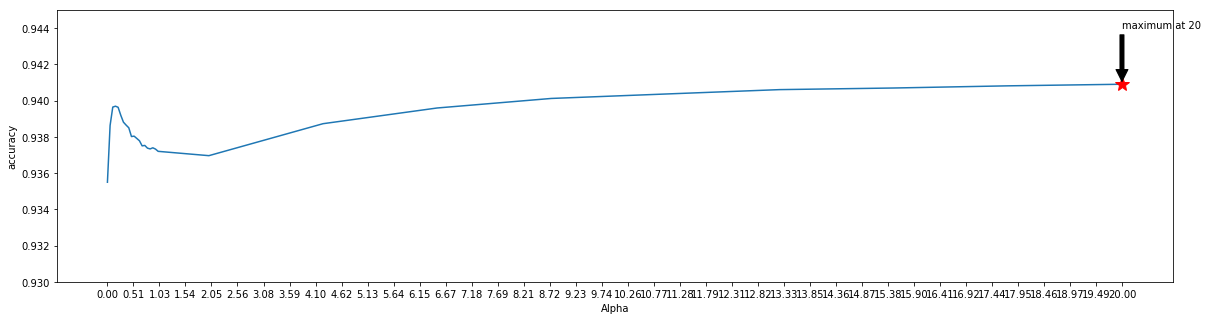

In [148]:
import matplotlib.pyplot as plt
print(classification.best_score_)
print(classification.best_estimator_)
scores=classification.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
x=np.append(np.linspace(0,1,20),np.linspace(2,20,9))
#plt.xlim(0,1)
plt.ylim(0.93,0.945)
plt.xticks(np.linspace(0,20,40))
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14,linestyle="-")
plt.annotate('maximum at 20 ', xy=(x[index], scores[index]), xytext=(20, 0.944),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

# observation
**For the alpha=20  Im getting best f1_score however the acuuracy is not much chnaged from aplha=1 and using high aplha might results in underfitting of model  so Im going to use alpha=1 in training**

In [81]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np
nb=BernoulliNB(alpha=1)
nb.fit(bow_vec,df_train_y)
words=[count_vec.get_feature_names()[i] for i in nb.feature_log_prob_[0].argsort()[-20:]]
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"negative",words)
words=[count_vec.get_feature_names()[i] for i in nb.feature_log_prob_[1].argsort()[-20:]]
table.insert_column(0,"positive",words)
print("Top 20 Important features")
print(table)


Top 20 Important features
+----------+----------+
| positive | negative |
+----------+----------+
|  tried   |   love   |
+----------+----------+
|  better  |   food   |
+----------+----------+
|   tea    |  great   |
+----------+----------+
|   make   |   bad    |
+----------+----------+
|   use    |   time   |
+----------+----------+
|   time   |   try    |
+----------+----------+
|   don    |   did    |
+----------+----------+
|  little  |  better  |
+----------+----------+
|    ve    |  bought  |
+----------+----------+
|  amazon  |  tried   |
+----------+----------+
|  really  |  amazon  |
+----------+----------+
|   best   |  really  |
+----------+----------+
|   love   |   buy    |
+----------+----------+
| product  |   don    |
+----------+----------+
|  flavor  |  flavor  |
+----------+----------+
|   just   |   good   |
+----------+----------+
|  taste   |   just   |
+----------+----------+
|  great   | product  |
+----------+----------+
|   good   |  taste   |
+----------+--

+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|      0.914      |    0.961     |  0.937   |     0.887      |
+-----------------+--------------+----------+----------------+


Text(24,0.5,'Actual')

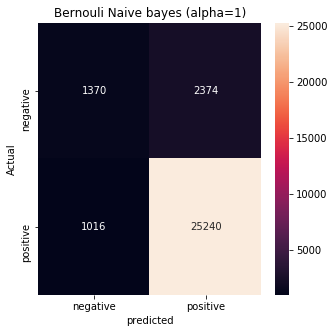

In [82]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
op=nb.predict(test_vec)
correct=op==df_test_y
cm=confusion_matrix(df_test_y,op)
dcsummary = pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive'])
predicted=list(map(lambda x: 1 if x=='positive' else 0,op))
actual=list(map(lambda x: 1 if x=='positive' else 0,df_test_y))
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(actual,predicted)])
table.insert_column(1,"recall_score",[recall_score(actual,predicted)])
table.insert_column(2,"f1_score",[f1_score(actual,predicted)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
heat_plot_bow.append(f1_score(actual,predicted))
print(table)
plt.figure(figsize=(5,5))
sb.heatmap(dcsummary,annot=True, fmt='g')
plt.title("Bernouli Naive bayes (alpha=1)")
plt.xlabel("predicted")
plt.ylabel("Actual")

# observations
 1.**Recall score 96% which indicates that among the total reviews which are labled as positive, 96% are atually positive.** <br>
 2.**Precision score is 91 which means from total positive reviews in test data, model identifed correctly 91% of them as positive.** <br>
 3.**The models f1 score is 93% which is doing a good job**.

**Multinomial naive bayes**

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(stop_words = 'english')
count_vec.fit(df_train_x["Text"])
bow_vec=count_vec.transform(df_train_x["Text"])
test_vec=count_vec.transform(df_test_x["Text"])
print(test_vec.shape,bow_vec.shape)

(30000, 50580) (70000, 50580)


In [150]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
label=LabelEncoder()
label.fit(df_train_y)
y=label.transform(df_train_y)
time_cv=TimeSeriesSplit(n_splits=3).split(bow_vec)
clf=GridSearchCV(MultinomialNB(),parameters,cv=time_cv,scoring="f1")
classification=clf.fit(bow_vec,y)

/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0.894736842105263, class_prior=None, fit_prior=True)
0.9454099424048815
17


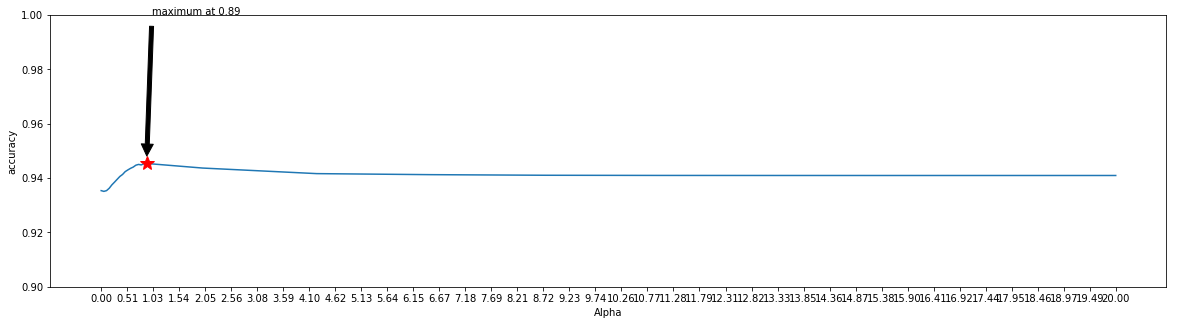

In [151]:
print(classification.best_estimator_)
print(classification.best_score_)
scores=classification.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
#plt.xlim(0,1)
x=np.append(np.linspace(0,1,20),np.linspace(2,20,9))
plt.xticks(np.linspace(0,20,40))
plt.ylim(0.9,1)
#plt.xticks(np.linspace(0,10,20))
#x=np.linspace(0,10,50)
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14)
plt.annotate('maximum at 0.89', xy=(x[index], scores[index]), xytext=(1, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()


# Observation
**For the alpha=0.89 the model is giving good f1 score of 94.5% so Im going to use alpha=0.98 in training naive bayes model.**

+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|      0.929      |    0.965     |  0.946   |     0.905      |
+-----------------+--------------+----------+----------------+


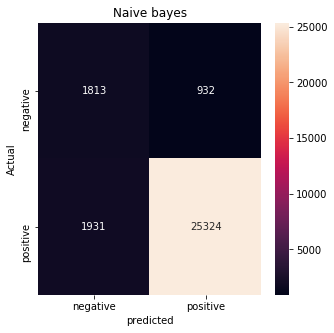

Top 30 Important words 
+----------+-----------+
| negative | positive  |
+----------+-----------+
|   way    |   drink   |
+----------+-----------+
| ordered  |   sweet   |
+----------+-----------+
|  little  |    try    |
+----------+-----------+
|    ve    |    eat    |
+----------+-----------+
|  great   |   price   |
+----------+-----------+
|   love   | chocolate |
+----------+-----------+
|   eat    |    buy    |
+----------+-----------+
|   make   |   sugar   |
+----------+-----------+
|   bad    |   tried   |
+----------+-----------+
|   try    |  better   |
+----------+-----------+
|   time   |   food    |
+----------+-----------+
|  bought  |   make    |
+----------+-----------+
|  sugar   |   time    |
+----------+-----------+
|   did    |    don    |
+----------+-----------+
|  better  |  little   |
+----------+-----------+
|   box    |  amazon   |
+----------+-----------+
|  tried   |    use    |
+----------+-----------+
|  really  |    ve     |
+----------+-----------+
|

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
import seaborn as sb
mul=MultinomialNB(alpha=0.98)
mul.fit(bow_vec,df_train_y)
op=mul.predict(test_vec)
correct=op==df_test_y
actual=list(map(lambda x: 1 if x=="positive" else 0,df_test_y))
predicted=list(map(lambda x: 1 if x=="positive" else 0,op))
cm=confusion_matrix(op,df_test_y)
csummary = pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive'])

from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(actual,predicted)])
table.insert_column(1,"recall_score",[recall_score(actual,predicted)])
table.insert_column(2,"f1_score",[f1_score(actual,predicted)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
print(table)
heat_plot_bow.append(f1_score(actual,predicted)) # bow multinomial

plt.figure(figsize=(5,5))
sb.heatmap(csummary,annot=True, fmt='g')
plt.title("Naive bayes")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()


words=[count_vec.get_feature_names()[i] for i in mul.feature_log_prob_[0].argsort()[-30:]]
table=BeautifulTable()
table.insert_column(0,"negative",words)
words=[count_vec.get_feature_names()[i] for i in mul.feature_log_prob_[1].argsort()[-30:]]
table.insert_column(1,"positive",words)
print("Top 30 Important words ")
print(table)

# observations
 1.**Recall score 96% which indicates that among the total reviews which are labled as positive in testing, 96% are atually positive.** <br>
 
 2.**precision score 93% which indicates that among the total reviews which are positive, 93% are correctly classified as positive.** <br>
 
 3.**The models f1 score is 94% which is doing a good job**.

# Bigrams bag of words

**Bernouli naive bayes**

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(ngram_range=(1,2),binary=True,stop_words="english")
count_vec.fit(new_modi_reviews["Text"]) # fitting on train data
bow_vec=count_vec.transform(df_train_x["Text"]) # vector representation of each review in training
test_vec=count_vec.transform(df_test_x["Text"]) # vector representation of each review in testing
print(bow_vec.shape,test_vec.shape)

(70000, 1467404) (30000, 1467404)


1.**The Bi-grams vector representation has 14,67,404 features which means every review isrepresented with 14,67,404features** 

2.**I used grid search technique to obtain the best alpha value (hyperparameter for naive bayes) and the metric used is "f1_score"**

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
lable=LabelEncoder()
lable.fit(df_train_y)
y=lable.transform(df_train_y)
#print(parameters)
#parameters=[{'alpha': [0.0001, 0.003, 0.001, 0.03, 0.01, 0.1, 1.1]}]
time_cv=TimeSeriesSplit(n_splits=3).split(bow_vec)
grid=GridSearchCV(BernoulliNB(),parameters,cv=time_cv,scoring="f1")
classification=grid.fit(bow_vec,y)

/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


BernoulliNB(alpha=6.5, binarize=0.0, class_prior=None, fit_prior=True)
0.9410716327084453
22


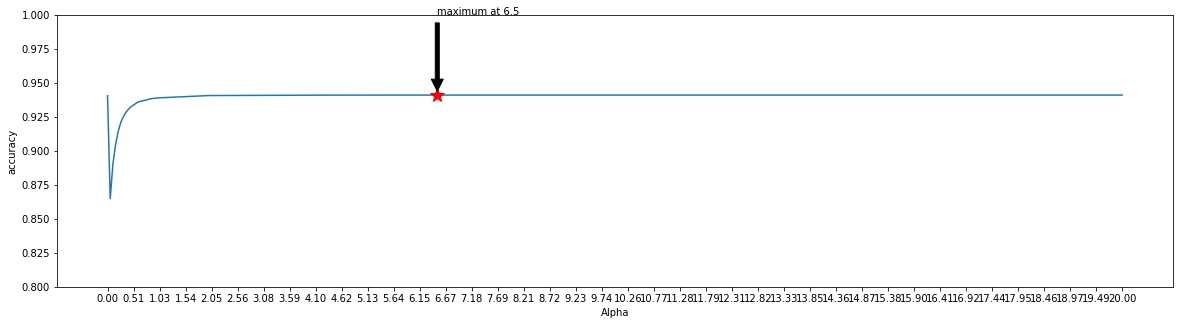

In [89]:
#print(classification.best_score_)
#print(classification.best_estimator_)
print(classification.best_estimator_)
print(classification.best_score_)
scores=classification.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
#plt.xlim(0,1)
plt.ylim(0.8,1)
plt.xticks(np.linspace(0,20,40))
#x=[0.0001,0.003,0.001,0.03,0.01,0.1,1.1]
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14)
plt.annotate('maximum at 6.5 ', xy=(x[index], scores[index]), xytext=(6.5, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()


# Observation
**For the alpha=6.5 the model is giving good and the plot is also flat from alpha=1 and there is not much difference in accuracy from alpha=1 to alpha=6  and using high alpha could be results in underfitting the model so Im going to use alpha=1.0 in training naive bayes model.**

+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|      0.878      |     0.98     |  0.926   |     0.863      |
+-----------------+--------------+----------+----------------+


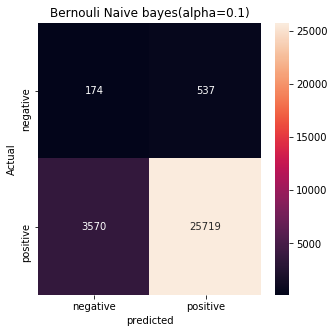

Top 30 Important words
+-----------+----------+
| negative  | positive |
+-----------+----------+
|   sugar   |  tastes  |
+-----------+----------+
|   food    |   know   |
+-----------+----------+
| delicious |  little  |
+-----------+----------+
|   used    |   didn   |
+-----------+----------+
|   sweet   |   eat    |
+-----------+----------+
|  coffee   | ordered  |
+-----------+----------+
|    eat    |   way    |
+-----------+----------+
|    try    |    ve    |
+-----------+----------+
|   price   |   make   |
+-----------+----------+
|    buy    |   box    |
+-----------+----------+
|   tried   |   love   |
+-----------+----------+
|  better   |   food   |
+-----------+----------+
|    tea    |  great   |
+-----------+----------+
|   make    |   bad    |
+-----------+----------+
|    use    |   time   |
+-----------+----------+
|   time    |   try    |
+-----------+----------+
|    don    |   did    |
+-----------+----------+
|  little   |  better  |
+-----------+----------+
| 

In [92]:
from sklearn.metrics import precision_score,recall_score,f1_score
bn=BernoulliNB(alpha=1)
bn.fit(bow_vec,df_train_y)
op=bn.predict(test_vec)
count=op==df_test_y
actual=list(map(lambda x: 1 if x=='positive' else 0,df_test_y))
predicted=list(map(lambda  x: 1 if x=='positive' else 0,op))

#cm=confusion_matrix(df_test_y,op)
cm=confusion_matrix(op,df_test_y)
dcsummary = pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive'])
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(actual,predicted)])
table.insert_column(1,"recall_score",[recall_score(actual,predicted)])
table.insert_column(2,"f1_score",[f1_score(actual,predicted)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
print(table)
heat_plot_bow.append(f1_score(actual,predicted)) # bow_bigrams bernouli



plt.figure(figsize=(5,5))
sb.heatmap(dcsummary,annot=True, fmt='g')
plt.title("Bernouli Naive bayes(alpha=0.1)")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()


table=BeautifulTable()
words=[count_vec.get_feature_names()[i] for i in bn.feature_log_prob_[1, :].argsort()[-30:] ]
table.insert_column(0,"negative",words)
words=[count_vec.get_feature_names()[i] for i in bn.feature_log_prob_[0, :].argsort()[-30:] ]
table.insert_column(1,"positive",words)
print("Top 30 Important words")
print(table)


# observations
 1.**Recall score 98% which indicates that among the total reviews which are labled as positive in testing, 98% are atually positive.** <br>
 
 2.**precision score 88% which indicates that among the total reviews which are positive, 88% are correctly classified as positive.** <br>
 
 3.**The models f1 score is 93% which is doing a good job**.

**Multinomial naive bayes**

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(ngram_range=(1,2),stop_words="english")
count_vec.fit(df_train_x["Text"])
bow_vec=count_vec.transform(df_train_x["Text"])
test_vec=count_vec.transform(df_test_x["Text"])
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
lable=LabelEncoder()
lable.fit(df_train_y)
y=lable.transform(df_train_y)
time_cv=TimeSeriesSplit(n_splits=3).split(bow_vec)

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(MultinomialNB(),parameters,cv=time_cv,scoring="f1")
clf=grid.fit(bow_vec,y)

/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0.6842105263157894, class_prior=None, fit_prior=True)
0.9440471369796336
13


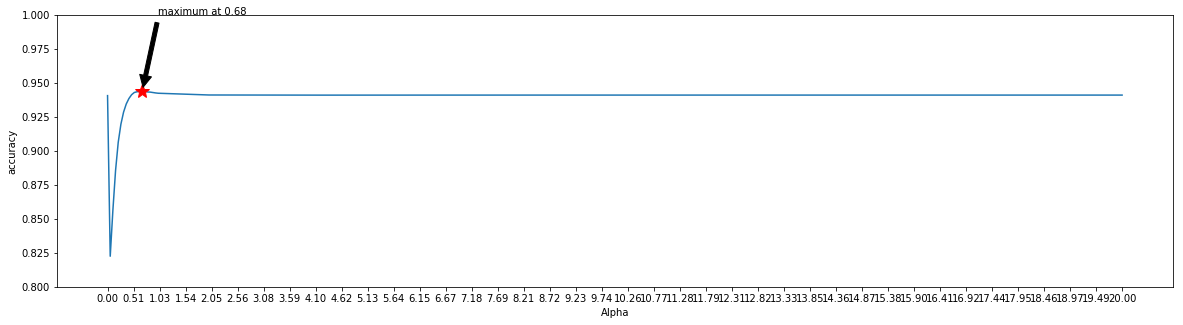

In [153]:
#print(clf.best_estimator_)
#print(clf.best_score_)

print(clf.best_estimator_)
print(clf.best_score_)
scores=clf.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
#plt.xlim(0,1)
plt.ylim(0.8,1.0)
plt.xticks(np.linspace(0,20,40))
#x=[0.0001,0.003,0.001,0.03,0.01,0.1,1.1]
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14)
plt.annotate('maximum at 0.68 ', xy=(x[index], scores[index]), xytext=(1, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()




# Observation
**For the alpha=0.68 the model is giving good f1 score of 94.4% so Im going to use alpha=0.68 in training naive bayes model.**

*******
[[  280  3464]
 [   38 26218]]
+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|      0.999      |    0.883     |  0.937   |     0.883      |
+-----------------+--------------+----------+----------------+


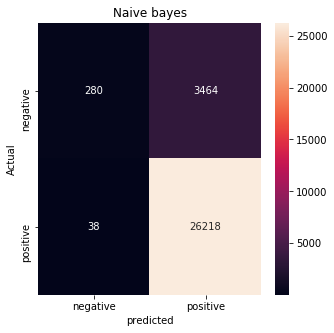

Top 30 Important words
+-----------+----------+
| negative  | positive |
+-----------+----------+
|   drink   |   way    |
+-----------+----------+
|   sweet   | ordered  |
+-----------+----------+
|    try    |  little  |
+-----------+----------+
|    eat    |    ve    |
+-----------+----------+
|   price   |  great   |
+-----------+----------+
| chocolate |   love   |
+-----------+----------+
|    buy    |   eat    |
+-----------+----------+
|   sugar   |   make   |
+-----------+----------+
|   tried   |   bad    |
+-----------+----------+
|  better   |   try    |
+-----------+----------+
|   food    |   time   |
+-----------+----------+
|   make    |  bought  |
+-----------+----------+
|   time    |  sugar   |
+-----------+----------+
|    don    |   did    |
+-----------+----------+
|  little   |  better  |
+-----------+----------+
|  amazon   |   box    |
+-----------+----------+
|    use    |  tried   |
+-----------+----------+
|    ve     |  really  |
+-----------+----------+
| 

In [98]:
classification=MultinomialNB(alpha=0.68)
clf=classification.fit(bow_vec,df_train_y)
op=clf.predict(test_vec)
count=op==df_test_y

print("*******")
#print("The accuracy score is ",sum(count)/len(df_test_y)*100)
actual=list(map(lambda x: 1 if x=='positive' else 0,df_test_y))
predicted=list(map(lambda  x: 1 if x=='positive' else 0,op))
cm=confusion_matrix(actual,predicted)
dcsummary=pd.DataFrame(cm,index=["negative","positive"],columns=["negative",'positive'])
print(cm)
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(predicted,actual)])
table.insert_column(1,"recall_score",[recall_score(predicted,actual)])
table.insert_column(2,"f1_score",[f1_score(actual,predicted)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
print(table)

heat_plot_bow.append(f1_score(actual,predicted)) # bow_bigrams multinomial




plt.figure(figsize=(5,5))
sb.heatmap(dcsummary,annot=True, fmt='g')
plt.title("Naive bayes")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

table=BeautifulTable()
words=[count_vec.get_feature_names()[i] for i in classification.feature_log_prob_[1, :].argsort()[-30:] ]
table.insert_column(0,"negative",words)
words=[count_vec.get_feature_names()[i] for i in clf.feature_log_prob_[0, :].argsort()[-30:] ]
table.insert_column(1,"positive",words)
print("Top 30 Important words")
print(table)





# observations
 1.**Recall score 88% which indicates that among the total reviews which are labled as positive in testing, 88% are atually positive.** <br>
 
 2.**precision score 99% which indicates that among the total reviews which are positive, 99% are correctly classified as positive.** <br>
 
 3.**The models f1 score is 94% which is doing a good job**.

# TF_IDF vectorizer - Unigrams

**Bernouli naive bayes**

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(binary=True,stop_words="english")
tf_idf_uni=tf_idf.fit(df_train_x["Text"])
heat_plot_idf=[]
bow_vec=tf_idf_uni.transform(df_train_x["Text"])
test_vec=tf_idf_uni.transform(df_test_x["Text"])
print(test_vec.shape,bow_vec.shape)

(30000, 50580) (70000, 50580)


In [100]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
time_cv=TimeSeriesSplit(n_splits=3).split(bow_vec)
lable=LabelEncoder()
lable.fit(df_train_y)
y=lable.transform(df_train_y)
grid=GridSearchCV(BernoulliNB(),parameters,cv=time_cv,scoring="f1")
clf=grid.fit(bow_vec,y)

/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


BernoulliNB(alpha=20.0, binarize=0.0, class_prior=None, fit_prior=True)
0.9409027369318246
28


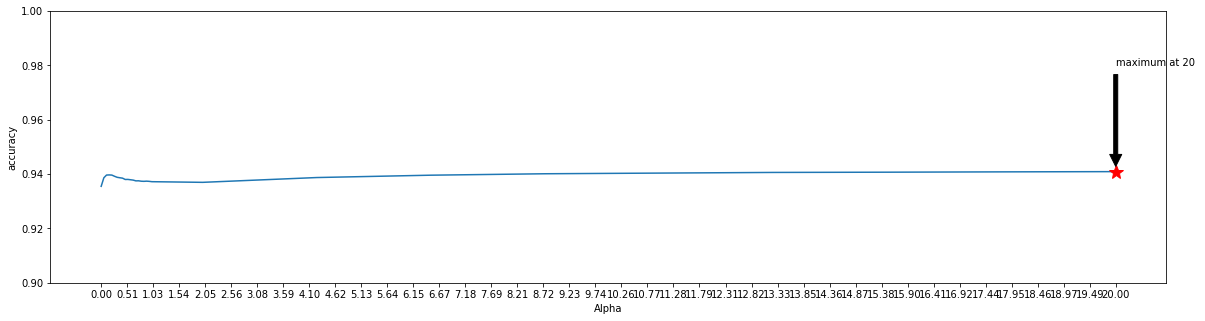

In [103]:
#print(clf.best_estimator_)
#print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_score_)
scores=clf.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
#plt.xlim(0,1)
plt.ylim(0.9,1.0)
plt.xticks(np.linspace(0,20,40))
#x=[0.0001,0.003,0.001,0.03,0.01,0.1,1.1]
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14)
plt.annotate('maximum at 20 ', xy=(x[index], scores[index]), xytext=(20, 0.98),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()


# Observation
**However highest accuracy occuring at alpha=20 and there is no significant changei accuracy fom alpha=1to alpha=20  so Im going to use alpha=1.1 in training naive bayes model.**

+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|      0.962      |    0.911     |  0.936   |     0.885      |
+-----------------+--------------+----------+----------------+


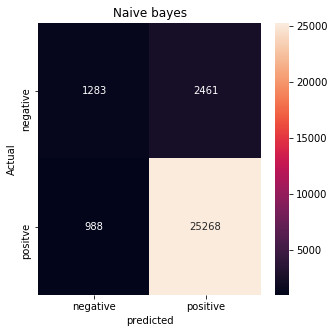

Top 30 Important words
+-----------+----------+
| negative  | positive |
+-----------+----------+
|   sugar   |  tastes  |
+-----------+----------+
|   food    |   know   |
+-----------+----------+
| delicious |  little  |
+-----------+----------+
|   used    |   didn   |
+-----------+----------+
|   sweet   |   eat    |
+-----------+----------+
|  coffee   | ordered  |
+-----------+----------+
|    eat    |   way    |
+-----------+----------+
|    try    |    ve    |
+-----------+----------+
|   price   |   make   |
+-----------+----------+
|    buy    |   box    |
+-----------+----------+
|   tried   |   love   |
+-----------+----------+
|  better   |   food   |
+-----------+----------+
|    tea    |  great   |
+-----------+----------+
|   make    |   bad    |
+-----------+----------+
|    use    |   time   |
+-----------+----------+
|   time    |   try    |
+-----------+----------+
|    don    |   did    |
+-----------+----------+
|  little   |  better  |
+-----------+----------+
| 

In [104]:
nb=BernoulliNB(alpha=1.1)
classification=nb.fit(bow_vec,df_train_y)
op=classification.predict(test_vec)
count=op==df_test_y
actual=list(map(lambda x: 1 if x=='positive' else 0,df_test_y))
predicted=list(map(lambda  x: 1 if x=='positive' else 0,op))
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(predicted,actual)])
table.insert_column(1,"recall_score",[recall_score(predicted,actual)])
table.insert_column(2,"f1_score",[f1_score(actual,predicted)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
print(table)
heat_plot_idf.append(f1_score(actual,predicted))
cm=confusion_matrix(actual,predicted)
csummary=pd.DataFrame(cm,index=["negative","positve"],columns=["negative","positive"])

plt.figure(figsize=(5,5))
sb.heatmap(csummary,annot=True, fmt='g')
plt.title("Naive bayes")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

table=BeautifulTable()
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[1, :].argsort()[-30:] ]
table.insert_column(0,"negative",words)
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[0, :].argsort()[-30:] ]
table.insert_column(1,"positive",words)
print("Top 30 Important words")
print(table)




# observations
 1.**Recall score 91% which indicates that among the total reviews which are labled as positive in testing, 91% are atually positive.** <br>
 
 2.**precision score 96% which indicates that among the total reviews which are positive, 96% are correctly classified as positive.** <br>
 
 3.**The models f1 score is 94% which is doing a good job**.

**Mulitinomial naive bayes**

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(stop_words="english")
tf_idf_uni=tf_idf.fit(df_train_x["Text"])
bow_vec=tf_idf_uni.transform(df_train_x["Text"])
test_vec=tf_idf_uni.transform(df_test_x["Text"])
print(test_vec.shape,bow_vec.shape)
from sklearn.model_selection import TimeSeriesSplit
time_cv=TimeSeriesSplit(n_splits=3).split(bow_vec)
grid=GridSearchCV(MultinomialNB(),parameters,cv=time_cv,scoring="f1")
clf=grid.fit(bow_vec,y) 

(30000, 50580) (70000, 50580)


/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0.05263157894736842, class_prior=None, fit_prior=True)
0.9440310247617427
1


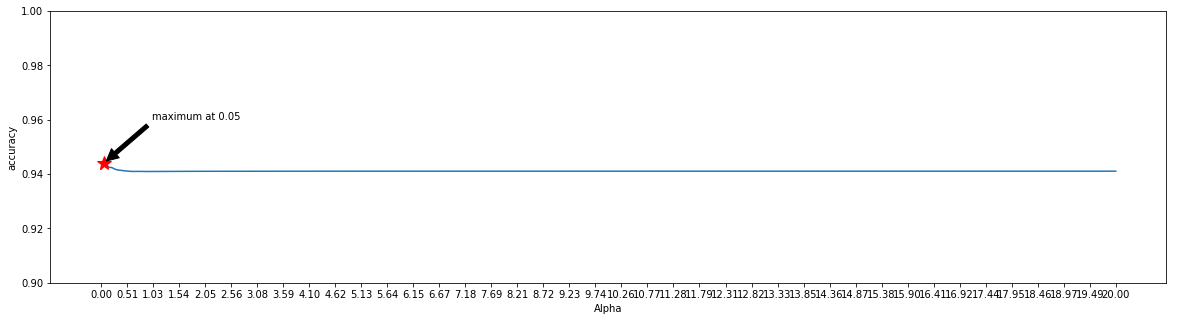

In [108]:
print(clf.best_estimator_)
print(clf.best_score_)

#print(classification.best_estimator_)
#print(classification.best_score_)
scores=clf.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
#plt.xlim(0,1)
plt.ylim(0.9,1)
plt.xticks(np.linspace(0,20,40))
#x=[0.0001,0.003,0.001,0.03,0.01,0.1,1]
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14)
plt.annotate('maximum at 0.05 ', xy=(x[index], scores[index]), xytext=(1, 0.96),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()




+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|      0.995      |     0.89     |   0.94   |     0.888      |
+-----------------+--------------+----------+----------------+


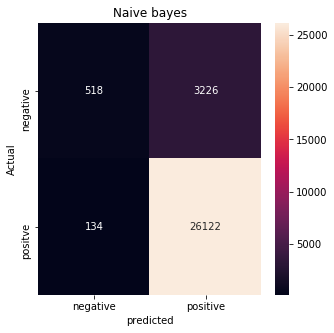

Top 30 Important words
+-----------+--------------+
| negative  |   positive   |
+-----------+--------------+
|   sweet   |     try      |
+-----------+--------------+
|   free    |    sugar     |
+-----------+--------------+
| delicious |  chocolate   |
+-----------+--------------+
|   food    |     eat      |
+-----------+--------------+
|    eat    |    tastes    |
+-----------+--------------+
|   sugar   |    order     |
+-----------+--------------+
|   tried   |    better    |
+-----------+--------------+
|    don    |   thought    |
+-----------+--------------+
|  better   |     didn     |
+-----------+--------------+
|   make    |   ordered    |
+-----------+--------------+
| chocolate | disappointed |
+-----------+--------------+
|    buy    |    money     |
+-----------+--------------+
|   time    |     food     |
+-----------+--------------+
|  little   |    tried     |
+-----------+--------------+
|    use    |    really    |
+-----------+--------------+
|    ve     |    ama

In [109]:
nb=MultinomialNB(alpha=0.0526)
classification=nb.fit(bow_vec,df_train_y)
op=classification.predict(test_vec)
count=op==df_test_y
actual=list(map(lambda x: 1 if x=='positive' else 0,df_test_y))
predicted=list(map(lambda  x: 1 if x=='positive' else 0,op))

from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(predicted,actual)])
table.insert_column(1,"recall_score",[recall_score(predicted,actual)])
table.insert_column(2,"f1_score",[f1_score(actual,predicted)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
print(table)
heat_plot_idf.append(f1_score(actual,predicted))
cm=confusion_matrix(actual,predicted)
csummary=pd.DataFrame(cm,index=["negative","positve"],columns=["negative","positive"])
plt.figure(figsize=(5,5))
sb.heatmap(csummary,annot=True, fmt='g')
plt.title("Naive bayes")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

table=BeautifulTable()
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[1, :].argsort()[-30:] ]
table.insert_column(0,"negative",words)
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[0, :].argsort()[-30:] ]
table.insert_column(1,"positive",words)
print("Top 30 Important words")
print(table)


# observations
 1.**Recall score 89% which indicates that among the total reviews which are labled as positive in testing, 89% are atually positive.** <br>
 
 2.**precision score 99% which indicates that among the total reviews which are positive, 99% are correctly classified as positive.** <br>
 
 3.**The models f1 score is 94% which is doing a good job**.

# TF_IDF Bigrams 

**Bernouli naive bayes**

In [110]:
tf_idf=TfidfVectorizer(ngram_range=(1,2),binary=True,stop_words="english")
tf_idf_bi=tf_idf.fit(df_train_x["Text"])
bow_vec=tf_idf_bi.transform(df_train_x["Text"])
test_vec=tf_idf_bi.transform(df_test_x["Text"])
print(bow_vec.shape,test_vec.shape)

(70000, 1106200) (30000, 1106200)


In [111]:
from sklearn.model_selection import TimeSeriesSplit
time_cv=TimeSeriesSplit(n_splits=4).split(bow_vec)
grid=GridSearchCV(BernoulliNB(),parameters,cv=time_cv,scoring="f1")
clf=grid.fit(bow_vec,y)

/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


BernoulliNB(alpha=8.75, binarize=0.0, class_prior=None, fit_prior=True)
0.9416796115281989
23


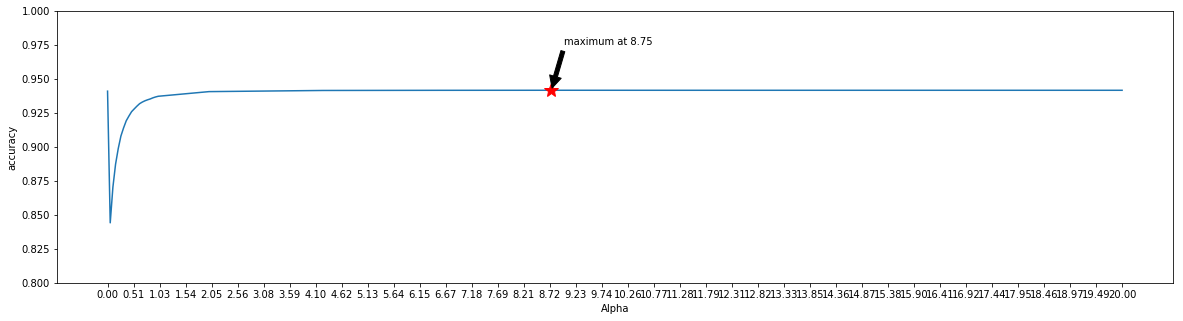

In [113]:
print(clf.best_estimator_)
print(clf.best_score_)
#print(classification.best_estimator_)
#print(classification.best_score_)
scores=clf.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
#plt.xlim(0,1)
plt.ylim(0.8,1)
plt.xticks(np.linspace(0,20,40))
#x=[0.0001,0.003,0.001,0.03,0.01,0.1,1.1,2,3,4,5,6,10]
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14)
plt.annotate('maximum at 8.75 ', xy=(x[index], scores[index]), xytext=(9, 0.975),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()


# observation
**Eventhough high accuracy occuring at alpha=8.75 but plot is steady from alpha=1 and there is no significant chenage inaccracy from alpha=1 to alpha=9 and using high alpha could be results in underfitting so im going to using alpha = 1 in training.**

+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|      0.999      |    0.876     |  0.933   |     0.875      |
+-----------------+--------------+----------+----------------+


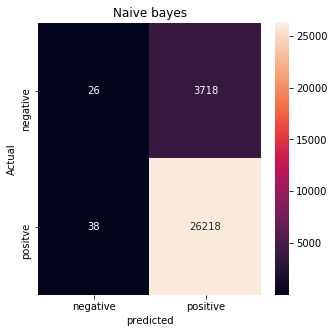

Top 30 Important words
+-----------+----------+
| negative  | positive |
+-----------+----------+
|   sugar   |  tastes  |
+-----------+----------+
|   food    |   know   |
+-----------+----------+
| delicious |  little  |
+-----------+----------+
|   used    |   didn   |
+-----------+----------+
|   sweet   |   eat    |
+-----------+----------+
|  coffee   | ordered  |
+-----------+----------+
|    eat    |   way    |
+-----------+----------+
|    try    |    ve    |
+-----------+----------+
|   price   |   make   |
+-----------+----------+
|    buy    |   box    |
+-----------+----------+
|   tried   |   love   |
+-----------+----------+
|  better   |   food   |
+-----------+----------+
|    tea    |  great   |
+-----------+----------+
|   make    |   bad    |
+-----------+----------+
|    use    |   time   |
+-----------+----------+
|   time    |   try    |
+-----------+----------+
|    don    |   did    |
+-----------+----------+
|  little   |  better  |
+-----------+----------+
| 

In [115]:
nb=BernoulliNB(alpha=1)
classification=nb.fit(bow_vec,df_train_y)
op=classification.predict(test_vec)
count=op==df_test_y
actual=list(map(lambda x: 1 if x=='positive' else 0,df_test_y))
predicted=list(map(lambda  x: 1 if x=='positive' else 0,op))
com=confusion_matrix(actual,predicted)
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(predicted,actual)])
table.insert_column(1,"recall_score",[recall_score(predicted,actual)])
table.insert_column(2,"f1_score",[f1_score(actual,predicted)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
print(table)
heat_plot_idf.append(f1_score(actual,predicted))
cm=confusion_matrix(actual,predicted)
csummary=pd.DataFrame(cm,index=["negative","positve"],columns=["negative","positive"])

plt.figure(figsize=(5,5))
sb.heatmap(csummary,annot=True, fmt='g')
plt.title("Naive bayes")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()


table=BeautifulTable()
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[1, :].argsort()[-30:] ]
table.insert_column(0,"negative",words)
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[0, :].argsort()[-30:] ]
table.insert_column(1,"positive",words)
print("Top 30 Important words")
print(table)








# observations
 1.**Recall score 87.6% which indicates that among the total reviews which are labled as positive in testing, 87.6% are atually positive.** <br>
 
 2.**precision score 99% which indicates that among the total reviews which are positive, 99% are correctly classified as positive.** <br>
 
 3.**The models f1 score is 93% which is doing a good job**.

**Multinomial naive bayes** 

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import TimeSeriesSplit
tf_idf=TfidfVectorizer(ngram_range=(1,2),stop_words="english")
tf_idf_uni=tf_idf.fit(df_train_x["Text"])
bow_vec=tf_idf_uni.transform(df_train_x["Text"])
test_vec=tf_idf_uni.transform(df_test_x["Text"])
print(test_vec.shape,bow_vec.shape)
time_cv=TimeSeriesSplit(n_splits=4).split(bow_vec)
grid=GridSearchCV(MultinomialNB(),parameters,cv=time_cv,scoring="f1")
clf=grid.fit(bow_vec,y)

(30000, 1106200) (70000, 1106200)


/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/raviiit121/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0.10526315789473684, class_prior=None, fit_prior=True)
0.9428248288109519
2


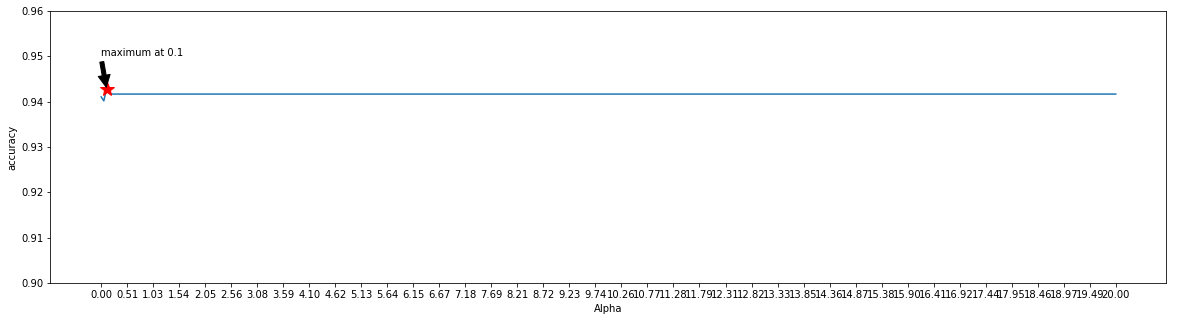

In [118]:
print(clf.best_estimator_)
print(clf.best_score_)
scores=clf.cv_results_['mean_test_score']
#print(scores)
plt.figure(figsize=(20,5))
plt.xlabel("Alpha")
plt.ylabel("accuracy")
#plt.xlim(0,1)
plt.ylim(0.9,0.96)
plt.xticks(np.linspace(0,20,40))
#x=np.linspace(0,1,100)
x=np.append(np.linspace(0,1,20),np.linspace(2,20,9))
plt.plot(x,scores)
index=np.argmax(scores)
print(index)
plt.plot(x[index], scores[index], 'r*',markersize=14)
plt.annotate('maximum at 0.1 ', xy=(x[index], scores[index]), xytext=(0, 0.95),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()


+-----------------+--------------+----------+----------------+
| precision_score | recall_score | f1_score | accuracy_score |
+-----------------+--------------+----------+----------------+
|       1.0       |    0.877     |  0.934   |     0.877      |
+-----------------+--------------+----------+----------------+


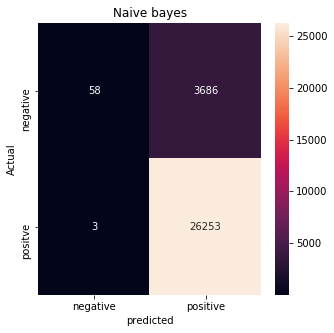

Top 30 Important words
+-----------+--------------+
| negative  |   positive   |
+-----------+--------------+
|   sweet   |     try      |
+-----------+--------------+
|   free    |     eat      |
+-----------+--------------+
| delicious |  chocolate   |
+-----------+--------------+
|    eat    |    tastes    |
+-----------+--------------+
|   sugar   |    sugar     |
+-----------+--------------+
|   food    |    order     |
+-----------+--------------+
|   tried   |   thought    |
+-----------+--------------+
|    don    |    better    |
+-----------+--------------+
|  better   |     didn     |
+-----------+--------------+
|    buy    | disappointed |
+-----------+--------------+
|   make    |    money     |
+-----------+--------------+
| chocolate |   ordered    |
+-----------+--------------+
|   time    |    tried     |
+-----------+--------------+
|  little   |     food     |
+-----------+--------------+
|   price   |    really    |
+-----------+--------------+
|    ve     |    bou

In [119]:
nb=MultinomialNB(alpha=0.10)
classification=nb.fit(bow_vec,df_train_y)
op=classification.predict(test_vec)
count=op==df_test_y
actual=list(map(lambda x: 1 if x=='positive' else 0,df_test_y))
predicted=list(map(lambda  x: 1 if x=='positive' else 0,op))

from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"precision_score",[precision_score(predicted,actual)])
table.insert_column(1,"recall_score",[recall_score(predicted,actual)])
table.insert_column(2,"f1_score",[f1_score(predicted,actual)])
table.insert_column(3,"accuracy_score",[accuracy_score(actual,predicted)])
print(table)
heat_plot_idf.append(f1_score(actual,predicted))
cm=confusion_matrix(actual,predicted)
csummary=pd.DataFrame(cm,index=["negative","positve"],columns=["negative","positive"])

plt.figure(figsize=(5,5))
sb.heatmap(csummary,annot=True, fmt='g')
plt.title("Naive bayes")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()


table=BeautifulTable()
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[1, :].argsort()[-30:] ]
table.insert_column(0,"negative",words)
words=[tf_idf.get_feature_names()[i] for i in nb.feature_log_prob_[0, :].argsort()[-30:] ]
table.insert_column(1,"positive",words)
print("Top 30 Important words")
print(table)






# observations
 1.**Recall score 87.7% which indicates that among the total reviews which are labled as positive in testing, 87.7% are atually positive.** <br>
 
 2.**precision score 99.9% which indicates that among the total reviews which are positive, 99.9% are correctly classified as positive.** <br>
 
 3.**The models f1 score is 93.4% which is failrly doing a good job**.

# word2vec model 

I did not used word2vec model because
**The features values which we get in word2vec is dependent I mean if two words are similar then they get similar vecotr which results in depedent relation. But naive bayes assumes that features are independent and works well if the features are indepenedent from each other.**

# conclusion

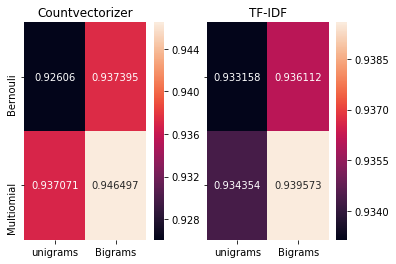

In [125]:
heat_plot_bow=np.unique(heat_plot_bow)
x=np.array(heat_plot_bow).reshape(2,2)
data=np.transpose(x)
d=pd.DataFrame(data,index=["Bernouli","Multiomial"],columns=["unigrams","Bigrams"])
heat_plot_idf=np.unique(heat_plot_idf)
y=np.array(heat_plot_idf).reshape(2,2)
data1=np.transpose(y)
d1=pd.DataFrame(data1,index=["Bernouli","Multiomial"],columns=["unigrams","Bigrams"])


temp_list=[d,d1]
temp_title=["Countvectorizer","TF-IDF"]
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True)
index=0
for ax in axn.flat:
    ax.set_title(temp_title[index])
    sb.heatmap(temp_list[index], ax=ax,annot=True,fmt='g')
    index+=1

**The above plot explains its accuracy for every combination of [bernouli,multinomial] vs [Countvectorizer,TF-IDF]**


In [133]:
from beautifultable import BeautifulTable
table=BeautifulTable()
model_names=["BOW_unigrams_Bernouli","BOW_unigrams_Multinomial","BOW_Bigrams_bernouli","BOW_Bigrams_Multinomial","TF_IDF_unigrams_Bernouli","TF_IDF_unigrams_Multinomial","TF_IDF_Bigrams_Bernouli","TF_IDF_Bigrams_Multinomial"]
alpha=[20,0.89,6.5,0.68,20,0.056,8.75,0.10]
acccuracy=[93.7,94.6,92.6,93.7,93.6,94,93.3,93.4]
cv_accuracy=[94,94.5,94.1,94.4,94,94.5,94.16,94.2]
table.insert_column(0,"model",model_names)
table.insert_column(1,"alpha",alpha)
table.insert_column(2,"CV-accuracy(f1-score)",cv_accuracy)
table.insert_column(3,"accuracy(f1-score)",acccuracy)
print(table)

+---------------------------+-------+----------------------+-------------------+
|           model           | alpha | CV-accuracy(f1-score | accuracy(f1-score |
|                           |       |          )           |         )         |
+---------------------------+-------+----------------------+-------------------+
|   BOW_unigrams_Bernouli   |  20   |          94          |       93.7        |
+---------------------------+-------+----------------------+-------------------+
| BOW_unigrams_Multinomial  | 0.89  |         94.5         |       94.6        |
+---------------------------+-------+----------------------+-------------------+
|   BOW_Bigrams_bernouli    |  6.5  |         94.1         |       92.6        |
+---------------------------+-------+----------------------+-------------------+
|  BOW_Bigrams_Multinomial  | 0.68  |         94.4         |       93.7        |
+---------------------------+-------+----------------------+-------------------+
| TF_IDF_unigrams_Bernouli  


 

1. **Analyzed naive bayes algorithm using different models such as Bernouli and Multinomial naive bayes.**


2. **From above plot we can conclude that each model is performing well and each accuracy is over 90%.**